# Assignment-3

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ece657a-w20-asg3-part2/testX.csv
/kaggle/input/ece657a-w20-asg3-part2/train.csv


# Question-2

# Importing the Liberaries

In [1]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import itertools

In [3]:
# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  


import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input, UpSampling2D, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, regularizers
from sklearn import metrics
from keras.optimizers import Adam, SGD
from keras.models import Model, load_model



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns



# 2.1: Design and Implementation Choices of your Model

A CNN is a class of deep neural network that is mostly used in the field of computer vision and imaging. CNNs are used to identify images, cluster them by their similarity, and implement object recognition within scenes. On a simple note, what we want the computer to do is to be able to differentiate between all the images those are given and figure out the unique features that make a dog a dog or that make a cat a cat. This is the process that goes on in our minds subconsciously as well. When we look at a picture of a cat, we can classify it as such if the picture has identifiable features such as paws or 4 legs. Similarly, the computer can perform image classification by looking for low level features such as edges and curves, and then try to build up to more abstract concepts through a series of convolutional layers. This is a general overview of what a CNN does. Let’s get into the specifics.

# Load the dataset

In [4]:
#Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('testX.csv')
df_train = train_data.copy()
df_test = test_data.copy()

In [5]:
df_train.head()

,Id,Label,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,10000,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10002,0,0,0,0,0,0,0,0,0,...,31,9,0,0,0,0,0,0,0,0
3,10003,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10004,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#  Features Extraction 

Check for null values

In [6]:
#  for Train data
df_train.isnull().any().sum()

0

In [7]:

# for Test data 
df_test.isnull().any().sum()

0

In [8]:
df_train.Label.unique()

array([4, 0, 1, 2, 3], dtype=int64)

In [9]:
df_train['Label'].value_counts()

4    12067
2    11994
1    11986
3    11978
0    11975
Name: Label, dtype: int64

In [10]:

# Mapping Classes
Clothing = {0 , 1, 2, 3, 4}

In [11]:
train_data= df_train.drop(['Label','Id'],axis = 1)
train_data

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,31,9,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
train_data.shape


(60000, 784)

In [13]:
test_data = df_test.drop(['Id'],axis = 1)
test_data

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,169,131,0,0,0,0,0,0,0,0
9998,0,0,0,1,0,0,0,0,24,116,...,85,104,138,51,0,3,0,0,0,0


In [14]:
test_data.shape

(10000, 784)

In [15]:
y_train = df_train['Label']
y_train.shape

(60000,)

In [16]:
y_test = df_test['Id']
y_test.shape

(10000,)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(train_data,y_train, test_size=0.20, random_state = 42)

# Normalization, Reshape and Label Encoding

**Normalization**
* We perform a grayscale normalization to reduce the effect of illumination's differences.
* If we perform normalization, CNN works faster.

In [18]:
# Normalize the data
X_train = X_train.values.reshape((-1,28,28,1))
X_val = X_val.values.reshape((-1,28,28,1))
test_data = test_data.values.reshape((-1,28,28,1))

In [19]:
X_train.shape

(48000, 28, 28, 1)

In [20]:
X_val.shape

(12000, 28, 28, 1)

In [21]:
test_data.shape

(10000, 28, 28, 1)

#**Reshaping**
* Train and test images  pixels size (28 x 28)
* Reshaping all data to 28x28x1 3D matrices.
* Images are gray scaled in our model so it uses only one channel.

In [22]:
# changing into float
X_train = X_train.astype(int)/255
X_val = X_val.astype(int)/255
test_data = test_data.astype(int)/255
X_train.shape


(48000, 28, 28, 1)

In [23]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=5)
y_val = to_categorical(y_val, num_classes=5)


In [24]:
print(y_train.shape)
print(y_val.shape)

(48000, 5)
(12000, 5)


**Label Encoding**

The convolutional neural network cannot deal with categorical labels. Therefore, we transform the labels into binary vectors,
* We need to ‘one-hot-encode’  encodes labels/target variable to one hot vectors. This means that a column is created for each output category and a binary variable is inputted for each category. 
* for example- 
* 2 => [0,0,1,0,0,0,0,0,0,0]
* 4 => [0,0,0,0,1,0,0,0,0,0]

# Implementation of General Design Choice

#  Building a simple ConvNetwork


First we have tried simple convolution network,using Sequential Keras which is the easiest way to build a model in Keras. It allows us to build a model layer by layer. We add one layer at a time starting from input.


Next We add Convolutional Layers and use the ‘add()’ function to add layers to our model, which are the building blocks. These are convolution layers that deals with the input images, which are seen as 2-dimensional matrices.Kernel size is the size of the filter matrix for the convolution. So a kernel size of 3 means we have a 3x3 filter matrix. Conv2D with the following parameters:
* filters: 32
* kernel_size : (3 x 3)
* activation : relu;
* Maxpooling2D
* Flatten
* Desnse : 64 
* optimizer: Adam

Lets see how our model performs

In [25]:
model_1 = Sequential()
model_1.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(5, activation='softmax'))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                346176    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 325       
Total params: 346,821
Trainable params: 346,821
Non-trainable params: 0
_________________________________________________________________


# Batch size
When training neural networks it controls the accuracy of the error gradient. For instance; A batch size of 64 means that 64 samples from the training dataset will be used to estimate the error gradient before the model weights are updated. Here we have taken 64 batch size.

# Epochs
One Epoch is when all dataset is processed forward and backward through the neural network only one time.
So one epoch is counted when = (batch_size * number_iteration) >= number_data.
first we will train our data only for 25 epochs.


In [26]:
batch_size = 256
epochs = 25

# Compiling the model

Next, we need to compile our model. Compiling the model takes three parameters: optimizer, loss and metrics

1) Optimization - Algorithms help us minimize the Error Function and controls the learning rate. We will be using ‘adam’ as our optmizer that is generally a good optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.

2) Loss Function - for Binary Classification "binary_crossentropy" is used and for Multi-class Classification "categorical_crossentropy" is used. This is the most common choice for classification. A lower score indicates that the model is performing better. 

3) Matrics - Matrics we are going to use are following: 
* Accuracy
* F1 score
* precision
* Recall 
* Support

In [27]:
model_1.compile(optimizer=optimizers.Adam(lr = 0.001), loss="categorical_crossentropy", metrics=["accuracy"])

# Fitting the Model
Now we will train our model. To train, we will use the ‘fit()’ function on our model with the following parameters: training data (X_train), target data (y_train), and validate it validation data with a 80-20% split. Here, we also compute the computational time to check how effieciently our model performs.

In [28]:
import time
start = time.time()
History = model_1.fit(X_train, y_train,
        validation_data=(X_val, y_val),batch_size= 256, epochs=20)
end = time.time()
model_time = end-start
print("Total training time is {:0.2f} minute".format(model_time/60.0))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 19s 388us/step - loss: 0.7557 - accuracy: 0.6812 - val_loss: 0.5618 - val_accuracy: 0.7722
Epoch 2/20
48000/48000 [==============================] - 18s 379us/step - loss: 0.5027 - accuracy: 0.8001 - val_loss: 0.4503 - val_accuracy: 0.8276
Epoch 3/20
48000/48000 [==============================] - 18s 376us/step - loss: 0.4372 - accuracy: 0.8305 - val_loss: 0.4108 - val_accuracy: 0.8442
Epoch 4/20
48000/48000 [==============================] - 18s 379us/step - loss: 0.3985 - accuracy: 0.8465 - val_loss: 0.3988 - val_accuracy: 0.8422
Epoch 5/20
48000/48000 [==============================] - 18s 377us/step - loss: 0.3735 - accuracy: 0.8569 - val_loss: 0.3950 - val_accuracy: 0.8435
Epoch 6/20
48000/48000 [==============================] - 18s 373us/step - loss: 0.3552 - accuracy: 0.8625 - val_loss: 0.3539 - val_accuracy: 0.8615
Epoch 7/20
48000/48000 [==============================] 

We have trained our dataset for 20 epochs on 80-20 % validation split. We can see that training on a simple network gives highest 88% accuracy and it takes only 5 minutes time to run the model. 

Next, we will see the performace of our plots. 

# Plot 1 - Loss Vs Epochs

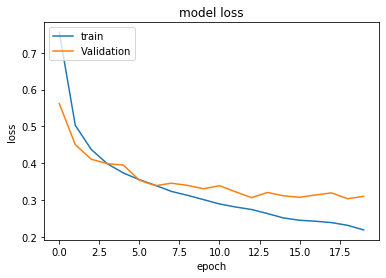

In [29]:
# plot summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

for the 20 epochs we have trained our dataset, here we can see that the training loss continues to decrease until the end of the training and the plot of validation loss decreases to a point and begins increasing again. This shows that our model is overfitting. 


# Plot 2 - Accuracy Vs Epochs

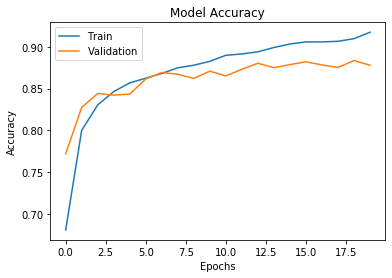

In [30]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])
plt.show()

By using this metrics we evaluate how accurate our model's prediction is compared to the train data. Here we can intrepret from the plot that the validtion accuracy is lower than the training accuracy. The gap between training and validation accuracy is a clear indication of overfitting in the model. The larger the gap, the higher the overfitting. 

# Prediction on Test Data

After training the dataset we will test our model performance on the test data by predicting the labels. 

In [31]:
cnn_pred_mnist_1 = model_1.predict(test_data)
for i in range(5):
    print(np.argmax(np.round(cnn_pred_mnist_1[i])))


3
4
0
1
0


# Confusion Matrix 

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and segregated by each class. This is the important key to the confusion matrix. The confusion matrix shows the ways in which the classification model is confused when it makes predictions. It represents not only the errors being made by a classifier but more importantly the types of errors that are being made. Here, we will be discussing about some matrics :

Classification Rate/Accuracy:

1. Recall:

It can be defined as the ratio of the total number of correctly classified positive classes divide to the total number of positive classes. High Recall indicates the class is correctly recognized

2. Precision:

To get the value of precision we divide the total number of correctly classified positive classes by the total number of predicted positive classes. High Precision indicates a class labeled as positive is indeed positive (a small number of FP)

**3. F1 Factor:

We calculate an F-measure which uses Harmonic Mean instead of Arithmetic Mean as it punishes the extreme values more. The F-Measure will always be nearer to the smaller value of Precision or Recall.

4. Support: **

The support is the number of samples of the true response that lie in that dataset. Support doesn’t change between models but instead diagnoses the evaluation process.


In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

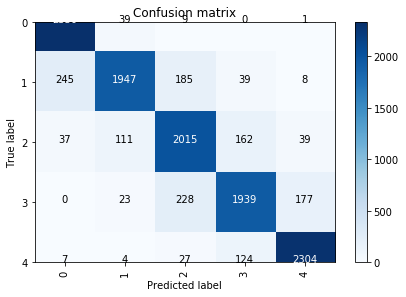

In [33]:
# Predict the values from the validation dataset
y_pred = model_1.predict(X_val)

# Convert predictions classes to one hot vectors 
y_pred_mnist_classes = np.argmax(y_pred,axis = 1) 

# Convert validation observations to one hot vectors
y_true_classes = np.argmax(y_val,axis = 1) 

# compute the confusion matrix
confusion_matrix = confusion_matrix(y_true_classes, y_pred_mnist_classes) 

# plot the confusion matrix
plot_confusion_matrix(confusion_matrix, classes = [0,1,2,3,4])


We can see that a large number of label 3 is misclassified as label 4, followed by label 2.
label 1 is misclassified as label 2, and label 2 is misclassified as label 3. 


In [34]:
cnn_f1_mnist_1 = metrics.f1_score(y_true_classes, y_pred_mnist_classes, average= "weighted")
cnn_accuracy_mnist_1 = metrics.accuracy_score(y_true_classes, y_pred_mnist_classes)
cnn_cm_mnist_1 = metrics.confusion_matrix(y_true_classes, y_pred_mnist_classes)
print("-----------------Convolutional Neural Network Report---------------")
print("F1 score: {}".format(cnn_f1_mnist_1))
print("Accuracy score: {}".format(cnn_accuracy_mnist_1))
print(metrics.classification_report(y_true_classes, y_pred_mnist_classes))


-----------------Convolutional Neural Network Report---------------
F1 score: 0.8840108998191272
Accuracy score: 0.8845833333333334
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      2379
           1       0.87      0.89      0.88      2424
           2       0.87      0.80      0.83      2364
           3       0.84      0.84      0.84      2367
           4       0.92      0.92      0.92      2466

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



Look at the precision of the class 2, we can see that our model predicted 80% correctly out of the total labels it has predicted. We did conclude the same from the confusion matrix, where we saw that label 2 and label 3 are misclassified. 
Label 0 and 4 has the highest precision, recall and othe classification report performance. 

In [35]:
for i in range(len(confusion_matrix)):
    print("Class:",str(i))
    print("Number of Wrong Prediction:", str(sum(confusion_matrix[i])-confusion_matrix[i][i]), "out of 12000")
    print("Percentage of True Prediction: {:.2f}%".format(confusion_matrix[i][i] / 5))
    print("***********************************************************")

Class: 0
Number of Wrong Prediction: 90 out of 12000
Percentage of True Prediction: 457.80%
***********************************************************
Class: 1
Number of Wrong Prediction: 276 out of 12000
Percentage of True Prediction: 429.60%
***********************************************************
Class: 2
Number of Wrong Prediction: 465 out of 12000
Percentage of True Prediction: 379.80%
***********************************************************
Class: 3
Number of Wrong Prediction: 369 out of 12000
Percentage of True Prediction: 399.60%
***********************************************************
Class: 4
Number of Wrong Prediction: 185 out of 12000
Percentage of True Prediction: 456.20%
***********************************************************


As shown in the above analysis we can conclude that class 0 has highest accuracy of true prediction followed by class 4, class 2 and class 1. Class 3 got the lowest performance in terms of all classification matrics. 

# 2.2 Implementation of your Design Choices (CNN three hidden layer)

**Building a Convolution Network**

The model has two main aspects: the feature extraction front end consists of convolutional and pooling layers, and the classifier backend that will make a prediction.

**Feature extraction-** The convolution + pooling layers perform feature extraction and make possible to detect features like two eyes, four legs, two wheels, building, face, roads, vehicle, etc. The convolution layers learn these complex features by building on top of each other. The first layers detect edges, the next layers combine them to detect shapes, to following layers merge this information to infer complete objects.

**Classification-

The fully connected layers act as a classifier on top of the extracted features, and assign a probability for the input image and represent certain class. 

# Model 2 Using Dropout Layer 

In our previous model we saw that our model overfits we will use the dropout layers to reduce it. A single model can be used to simulate having a large number of different network architectures by randomly dropping out nodes during training. This is called dropout and offers a very computationally cheap and remarkably effective regularization method to reduce overfitting and improve generalization error. Dropout is implemented per-layer in a neural network. 
We can try using different values of dropout rates at the different Conv2D and Dense layers to see if we get better performance,this is part of the hyper-parameter tuning process. I normally use dropout rates between 0.2–0.5.

Here I am going to explain our model architecture and design choice- 

Steps:

1) At First, we will use Sequential Keras and add () to add the layers sequentially in the model. Now, we can start building our convolutional neural network. The first layer Conv2D is a convolutional layer that takes a 2-dimensional matrix of 28 by 28 pixels in greyscale (1) as input. We add Conv2D layer with the following parameters:

1. filters: 32;
2. kernel_size : (3 x 3);
3. activation : relu;


2) It includes some HyperParameters such as The number of filters, Dimensions of Filter (F), Stride (S), Padding(P) , Activation Function (Rectified Linear Activation. This activation function has been proven to work well in neural networks.) etc. which we must decide manually.

* **Strides** - specifies how much we move the convolution filter at each step. We can have bigger strides if we want less overlap between the receptive fields making the resulting feature map smaller

* Adding **padding** to the convolutional operation can often result in better model performance. By default, the convolutional operation uses ‘valid’ padding, which means that convolutions are only applied where possible. But we have changed it to ‘same’ padding so that zero values are added around the input such that the output has the same size as the input.


3) Next, we add MaxPooling2D layers (pool_size- (2,2)), which are used for dimensionality reduction by outputting the maximum of the part of the input image that is captured by the filter matrix. These are used where we have lot of input features. It reduces the amount of parameters and computational power required, thus reducing Overfitting.

4) To avoid overfitting we add 'Dropout' layer. Dropout is implemented per-layer in a neural network and randomly dropping out nodes during training. It offers a very computationally cheap and remarkably effective regularization method to reduce overfitting and improve generalization error in deep neural networks. Dropout can be implemented on any or all hidden layers in the network as well as the input layer. It is not used on the output layer.

Parameters are used here: 0.2, 0.4, 0.5

5) We add Flatten layer that simply flattens the result from the previous layer into 1D vector. We then add Fully connected Layers after some convolutional/pooling layers. It combines all the Features of the Previous Layers. Flatten serves as a connection between the convolution and dense layers

6) Lastly, we add 'Dense’ that is the Output Layer. Dense is a standard layer type that is used in many cases for neural networks. We will have 5 nodes in our output layer, one for each possible outcome (0–4). 

The activation is ‘softmax’- Softmax makes the output sum up to 1 so the output can be interpreted as probabilities that assigns predicted probabilities to each of the five clothing categories. It has units equal to the number of classes to be identified. Here, use 'softmax' activation function in case of Multi-Class Classification.

Lets see how our model performs: 

In [36]:
model_2 = Sequential()
model_2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.2))
model_2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1), strides=1, padding='same'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.4))
model_2.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1), strides=1, padding='same' ))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.4))
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(5, activation='softmax'))

In [37]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 128)        

In [38]:
batch_size = 128
epochs = 20

# Compiling the model_2

In [39]:
model_2.compile(optimizer=optimizers.Adam(lr = 0.001), loss="categorical_crossentropy", metrics=["accuracy"])

# Fitting the Model

Now we will train our model. To train, we will use the ‘fit()’ function on our model with the following parameters: training data (X_train), target data (y_train), and validate it validation data with a 80-20% split. Here, we also compute the computational time to check how effieciently our model performs.

In [40]:
import time
start = time.time()
History = model_2.fit(X_train, y_train,
        validation_data=(X_val, y_val),batch_size= 128, epochs=20)
end = time.time()
model_time = end-start
print("Total training time is {:0.2f} minute".format(model_time/60.0))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 35s 734us/step - loss: 0.9591 - accuracy: 0.5745 - val_loss: 0.6723 - val_accuracy: 0.7311
Epoch 2/25
48000/48000 [==============================] - 32s 667us/step - loss: 0.6438 - accuracy: 0.7309 - val_loss: 0.5495 - val_accuracy: 0.7807
Epoch 3/25
48000/48000 [==============================] - 33s 678us/step - loss: 0.5672 - accuracy: 0.7684 - val_loss: 0.4841 - val_accuracy: 0.8083
Epoch 4/25
48000/48000 [==============================] - 32s 662us/step - loss: 0.5212 - accuracy: 0.7888 - val_loss: 0.4458 - val_accuracy: 0.8289
Epoch 5/25
48000/48000 [==============================] - 32s 670us/step - loss: 0.4852 - accuracy: 0.8039 - val_loss: 0.4376 - val_accuracy: 0.8243
Epoch 6/25
48000/48000 [==============================] - 32s 662us/step - loss: 0.4646 - accuracy: 0.8149 - val_loss: 0.4748 - val_accuracy: 0.7987
Epoch 7/25
48000/48000 [==============================] 

We notice that over-fitting has reduced further as the validation accuracy has improved by 2% (to 87–90% range).
Now we will be plotting the loss and accuracy graphs to see the performance. 

# Plot Model_2 - Loss vs Epochs

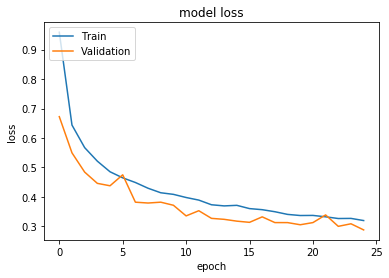

In [41]:
# plot summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

the validation and train loss bith are sync together, if we increase the  number of epochs there will be higher chance for a good fit model with lower loss. 

# Plot Model_2 - Accuracy vs Epochs

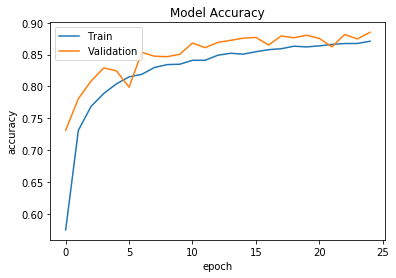

In [42]:
# plot summarize history for loss
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

From the plot of accuracy we can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs. We can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets. So the probability for increasing accuracy is higher with the number of epochs. 

# Confusion Matrix Model_2

Here, we will be plotting confusion matrix for model_2 and compare the results with previous model:


-----------------Convolutional Neural Network Report---------------
F1 score: 0.8849587050919293
Accuracy score: 0.885
Confusion matrix: 
 [[2289   74   16    0    0]
 [ 124 2149  105   41    5]
 [  15  218 1926  165   40]
 [   0   33  208 2031   95]
 [   3    9   26  203 2225]]
Plotting confusion matrix


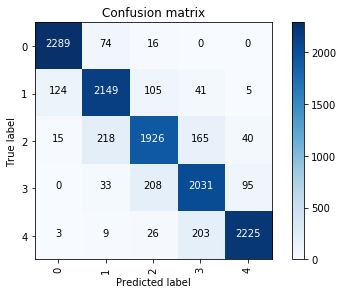

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2379
           1       0.87      0.89      0.88      2424
           2       0.84      0.81      0.83      2364
           3       0.83      0.86      0.85      2367
           4       0.94      0.90      0.92      2466

    accuracy                           0.89     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.89      0.89      0.88     12000



In [43]:
cnn_pred_mnist_2 = model_2.predict(X_val)
cnn_pred_mnist_2 = np.argmax(cnn_pred_mnist_2,axis=1)
y_true = np.argmax(y_val,axis=1)

cnn_f1_mnist_2 = metrics.f1_score(y_true, cnn_pred_mnist_2, average= "weighted")
cnn_accuracy_mnist_2 = metrics.accuracy_score(y_true, cnn_pred_mnist_2)
cnn_cm_mnist_2 = metrics.confusion_matrix(y_true, cnn_pred_mnist_2)
print("-----------------Convolutional Neural Network Report---------------")
print("F1 score: {}".format(cnn_f1_mnist_2))
print("Accuracy score: {}".format(cnn_accuracy_mnist_2))
print("Confusion matrix: \n", cnn_cm_mnist_2)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cnn_cm_mnist_2, classes = [0,1,2,3,4])
plt.show()

print(metrics.classification_report(y_true, cnn_pred_mnist_2))

from the above analysis we observe that we have got highest precision, recall, F1 score for class 0 and 4. class 2 and 3 are perfoming lower than other classes. 

In [44]:
for i in range(len(confusion_matrix)):
    print("Class:",str(i))
    print("Number of Wrong Prediction:", str(sum(confusion_matrix[i])-confusion_matrix[i][i]), "out of 12000")
    print("Percentage of True Prediction: {:.2f}%".format(confusion_matrix[i][i] / 5))
    print("***********************************************************")

Class: 0
Number of Wrong Prediction: 90 out of 12000
Percentage of True Prediction: 457.80%
***********************************************************
Class: 1
Number of Wrong Prediction: 276 out of 12000
Percentage of True Prediction: 429.60%
***********************************************************
Class: 2
Number of Wrong Prediction: 465 out of 12000
Percentage of True Prediction: 379.80%
***********************************************************
Class: 3
Number of Wrong Prediction: 369 out of 12000
Percentage of True Prediction: 399.60%
***********************************************************
Class: 4
Number of Wrong Prediction: 185 out of 12000
Percentage of True Prediction: 456.20%
***********************************************************


# ROC Curve

In [45]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
classes=5
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
y_score = model_2.predict_proba(X_val)
roc_auc = dict()
for i in range(classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:,i], y_score[:,i],pos_label = 1)
    roc_auc[i] = auc(fpr[i], tpr[i])


In [46]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(classes):
    mean_tpr = interp(all_fpr, fpr[i], tpr[i])

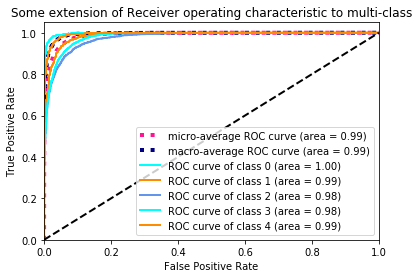

In [47]:
# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

From the above graph, we have plotted ROC curve for our best designed model which is CNN model_2. We have got more than 0.90 for all 5 classes which is accurate. So it is a natural measure of separability between the two estimated probability distributions thus for class_0 and class_4 has the highest AUC value (1) and for class_1, class_2 and class_3 has less AUC value when compared to other classes. AUC near to the 0 which means it has worst measure of separability.

# Prediction on Test Data
Here, model is predicted on test data and compare these predictions to the labels in the data set.

In [48]:
cnn_pred_mnist_2 = model_2.predict(test_data)
X = []
for i in range(10000):
    X.append(np.argmax(np.round(cnn_pred_mnist_2[i]))) 
    

In [49]:
X = pd.DataFrame(X)

In [50]:
y_id = df_test['Id']
y_id.shape

(10000,)

In [51]:
y_id = pd.DataFrame(y_id)

In [52]:
y_id.insert(1,'Label',X)

In [53]:
y_id.to_csv("Predicted_Labels_CNN_2.csv",index=False)

In [54]:
predictions = model_2.predict(test_data)
for i in range(5):
    print('prediction  '   +  str(i) +  ':  '   +   str(np.argmax(np.round(predictions[i]))))
    print('Actual  '   + str(i) + ':  '   +   str(y_val[i]))

prediction  0:  3
Actual  0:  [0. 1. 0. 0. 0.]
prediction  1:  4
Actual  1:  [1. 0. 0. 0. 0.]
prediction  2:  0
Actual  2:  [0. 0. 1. 0. 0.]
prediction  3:  1
Actual  3:  [0. 1. 0. 0. 0.]
prediction  4:  1
Actual  4:  [0. 0. 0. 0. 1.]


# Comparison of the different algorithms and parameters you tried

# Exploring other ML methods and Deep Neural Network variants to solve the problem - 

# 1-  Autoencoder
 
Autoencoders are considered an unsupervised learning technique because they don’t need explicit labels to train on. But to be more precise they are self-supervised because they can generate their own labels from the training data. 

Autoencoders outperform linear dimensionality reduction approaches (for example: Principle Component Analysis (PCA),) applying non-linear transformations using multiple layers and non-linear activation functions. An autoencoder is a neural network model that seeks to learn a compressed representation of an input. 

Autoencoders are data-specific, which means that they will only be able to compress data similar to what they have been trained on. To build an autoencoder, we need three things: an encoding function, a decoding function, and a "loss" function. A straight-forward task could be to compress a given image into discrete bits of information, and reconstruct the image back from these discrete bits.

Here, I am going to show you how to build a convolutional autoencoder from scratch, and then we provide one-hot encoded data for training. After training, we save the model, and finally, we will load and test the model on test data.


In [55]:
x_train = X_train.reshape(-1, 28, 28, 1)
x_test = X_val.reshape(-1, 28, 28, 1)


In [56]:
batch_size = 64
epochs = 10
inChannel = 1
x, y = 28, 28
input_image = Input(shape = (x, y, inChannel))
num_classes = 5

# Explanation of Design and Implementation Choices of the Model

An autoencoder is made of two modules: encoder and decoder

**Encoder:**

*     The encoder learns the underlying features of a process. These features are typically in a reduced dimension.
*     It has 2 Convolution blocks, each has a convolution layer after the first and second convolution blocks Max-pooling layer is used.
*     The first convolution block will have 256 filters of size 3 x 3, followed by a max-pooling layer
*     The second block will have 128 filters of size 3 x 3, followed by another max-pooling layer . The max-pooling layer downsample the   input by two times each time when it is used



In [57]:

learning_rate = 0.001
#checkpointer = ModelCheckpoint(filepath, verbose=0, save_best_only=True) # save best model
#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=5, verbose=1, mode='auto')

input_size = (28, 28, 1)

input_image = Input(shape=input_size)

# Encoder
x_encoder = Conv2D(256, (3, 3), activation='relu', padding='same')(input_image)
x_encoder = MaxPooling2D((2, 2), padding='same')(x_encoder)
x_encoder = Conv2D(128, (3, 3), activation='relu', padding='same')(x_encoder)
encoded = MaxPooling2D((2, 2), padding='same', name='encoded_layer')(x_encoder)


**Decoder:**

The decoder can recreate the original data from these underlying features.

*     It has 2 Convolution blocks, each has a convolution layer followed by Max-pooling layer
*     The first block will have 128 filters of size 3 x 3,
*     The second block will have 256 filters of size 3 x 3 followed by upsampling layer,
*     The final layer of encoder will have 1 filter of size 3 x 3 which will reconstruct back the input having a single channel.
*     upsampling layer will upsample the input by two times each time it is used.



In [58]:
# Decoder
x_decoder = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
x_decoder = UpSampling2D((2, 2))(x_decoder)
x_decoder = Conv2D(256, (3, 3), activation='relu', padding='same')(x_decoder)
x_decoder = UpSampling2D((2, 2))(x_decoder)
decoded = Conv2D(1, (3, 3), padding='same')(x_decoder)

Autoencoder training parameters:•

* Code size– Size of compressed data (amount of nodes in the middle layer)

* Number of Layers– Could be as deep as we want them to be
* Loss Function– Mean square error or binary cross entropy (if the input values in the range [0,1])
* Number of Nodes per Layers– Usually layers structure is symmetric for encoder and decoder, and amounts of nodes reduce the code. 


The max pooling is applied on each layer after the convolutional layer. The number of filters, the filter size, the number of layers, number of epochs we train our model, are all hyperparameters and should be decided based on our own intuition and measure the performance of our model. Activation function 'ReLu' is used here. optimizer we have used Adam with 0.001learning rate. We will be considering "Mean Squared Error" loss function. 

Lets see how our model performs: 

In [59]:
learning_rate = 0.001
autoencoder = Model(input_image, decoded)

autoencoder.compile(optimizer=Adam(lr=learning_rate),loss='mse')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 256)       2560      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 128)       295040    
_________________________________________________________________
encoded_layer (MaxPooling2D) (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 128)       0   

# Fit the Model

It's finally time to train the model with Keras fit() function. The model trains for 10 epochs (Because it gives 0.15 % validation loss, we tried to increase the epochs but it look more computation time to run the model) on x_train data and validate it on x_test data. The fit() function will return a history object. By storying the result of this function, we will use it later to plot the loss function plot between training and validation which will help us to analyze our model's performance visually. Using time we can calculate the computational time. 

In [60]:
import time
start = time.time()

history = autoencoder.fit(x_train, x_train, batch_size=batch_size,epochs=10,verbose=1,validation_data=(x_test, x_test))    

end = time.time()
autoencoder_time = end-start
print("Total training time is {:0.2f} minute".format(autoencoder_time/60.0))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 655s 14ms/step - loss: 0.0119 - val_loss: 0.0047
Epoch 2/10
48000/48000 [==============================] - 663s 14ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 3/10
48000/48000 [==============================] - 644s 13ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 4/10
48000/48000 [==============================] - 645s 13ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 5/10
48000/48000 [==============================] - 643s 13ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 6/10
48000/48000 [==============================] - 643s 13ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 7/10
48000/48000 [==============================] - 662s 14ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 8/10
48000/48000 [==============================] - 669s 14ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 9/10
48000/48000 [==============================] - 659s 14ms/step - loss: 0.0018 - val_

# Plot 1 - Epoch Vs Loss

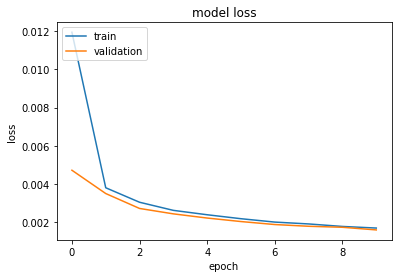

In [61]:
# plot summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Finally, we can see that the validation loss and the training loss both are sync together. It shows that the model is not overfitting: the validation loss is decreasing and not increasing, and there rarely any gap between training and validation loss. Therefore, we can say that our model's generalization capability is good. 

Finally, it's time to reconstruct the test data using the predict() function of Keras and see how well our model is able reconstruct on the test data.

# Applications of Autoencoder 

We have total control over the architecture of the autoencoder. We can make it very powerful by increasing the number of layers, nodes per layer and most importantly the size of model. Increasing these hyperparameters will let the autoencoder handle more complex codings. But we should be careful to not make it too powerful.

Unfortunately autoencoders are not widely used in real-world applications. As a compression method, they don’t perform better than its alternatives, for example jpeg compress photos better than an autoencoder. And the fact that autoencoders are data-specific makes them impractical as a general technique. Though, it can be used as following: 

1.	Data compression
2.	Dimensionality Reduction
3.	Image reconstruction
4.	Image coloring
5.	Feature variation and Denoising
6.	Generating higher resolution images
7.	Image search and information retrieval


# Conclusion

Autoencoders are a very useful dimensionality reduction technique. Visualizing high-dimensional data is challenging. T-SNE and PCA are most commonly used methods but T-SNE struggles with large number of dimensions. So autoencoders are used as a preprocessing step to reduce the dimensionality, and this compressed representation is used by t-SNE to visualize the data in 2D space. 

# 2-  ResNet (Residual Network) 

Residual Network (ResNet) is a Convolutional Neural Network (CNN)  architecture which was designed to enable hundreds or thousands of convolutional layers. While previous CNN architectures had a drop off in the effectiveness of additional layers, ResNet can add a large number of layers with strong performance. The core idea of ResNet is introducing a “identity shortcut connection” that uses skip connection to add the output from an earlier layer to a later layer. This helps it mitigating the vanishing gradient problem. 

Neural Networks are trained via the backpropagation process, which relies on gradient descent, reducing the loss function to find the weights that minimize it. If there are too many layers and repeated multiplication makes the gradient smaller and smaller, until it “disappears”, causing performance to saturate or even degrade with each additional layer.

 

# 2 - Building a Residual Network

In ResNets, a "shortcut" or a "skip connection" allows the gradient to be directly backpropagated to earlier layers: There are two components in there one is without skip connection ("main path") and other one is with skip connection ("shortcut to the main path") through the network. By stacking these ResNet blocks on top of each other, We are going to form a very deep network.

Two main types of blocks are used in a ResNet, depending mainly on whether the input/output dimensions are same or different. We are going to implement both of them. 

In [63]:
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import MaxPooling2D, AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook

from sklearn.utils import shuffle
import cv2
from keras import applications
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model

In [64]:
epochs = 10
batch_size = 128
data_augmentation = False
image_size = 28

number_classes = 5
number_filters = 64
number_of_blocks = 4
number_of_sub_blocks = 2
use_max_pool = False

# 2.1 - The identity block 

The identity block is the standard block used in ResNets, and corresponds to the case where the input activation has the same dimension as the output activation.
1. First component of main path: 

    The first CONV2D has filters of shape (1,1) and a stride of (1,1). Its padding is "same".
    The first BatchNorm is normalizing the channels axis. 
    Then apply the ReLU activation function.
    Kernel regularizer L2 is used here
    Now we will check for the maxpooling layer


In [65]:
#Creating model based on ResNet trained model

inputs = Input(shape=(28,28,1))
x = Conv2D(number_filters, padding='same', kernel_initializer='he_normal', kernel_size=7, strides=(1,1), kernel_regularizer=l2(1e-4))(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)

#Check by applying max pooling later 
if use_max_pool:
    x = MaxPooling2D(pool_size=3,padding='same', strides=2)(x)
    num_blocks =3

# 2.2 - The convolutional block
* Stacks of (1 x 1)-(3 x 3)-(1 x 1) BN-ReLU-Conv2D or also known as bottleneck layer
* First shortcut connection per layer is 1 x 1 Conv2D.
* Second and onwards shortcut connection is identity
* At the beginning of each stage, the feature map size is halved (downsampled)
* by a convolutional layer with strides=2, while the number of filter maps is doubled. Within each stage, the layers have the same number filters and the same filter map sizes.
    

In [66]:
# convolutional base (stack of blocks).

for stack in range(number_of_blocks):
    for res_block in range(number_of_sub_blocks):
        strides = 1
        layer_1 = res_block == 0 and stack > 0 #(first layer but not first stack)
        if layer_1:
            strides = 2 # it downsamples
            
 #Creating bottleneck residual mapping using y
    
        y = Conv2D(number_filters, kernel_size=3,padding='same',strides=strides, kernel_initializer='he_normal',
                   kernel_regularizer=l2(1e-4))(x)
        y = BatchNormalization()(y)
        y = Activation('relu')(y)
        y = Conv2D(number_filters,kernel_size=3, padding='same', kernel_initializer='he_normal',
                   kernel_regularizer=l2(1e-4))(y)
        y = BatchNormalization()(y)
        
        if layer_1:
            x = Conv2D(number_filters, kernel_size=1, padding='same',strides=2, kernel_initializer='he_normal',
                       kernel_regularizer=l2(1e-4))(x)    

The shortcut and the convolution path values are added together. Then apply the ReLU activation function. Number of filters are doubled in size. Now we will be adding classifier on top and add flatten layer. he flatten doesn't have any hyperparameters. The Fully Connected (Dense) layer reduces its input to the number of classes using a softmax activation with he_normal initializer.  

In [67]:
 #Adding back residual mapping
x = keras.layers.add([x, y])
x = Activation('relu')(x)

number_filters = 2 * number_filters

In [68]:
# Add classifier on top.
x = AveragePooling2D()(x)
y = Flatten()(x)
outputs = Dense(5, activation='softmax',kernel_initializer='he_normal')(y)


# Compile the model
Now we will be compiling our model using adam optimizer. and save the best model. 

In [69]:
# compile model.
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 28, 28, 64)   3200        input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 28, 28, 64)   256         conv2d_10[0][0]                  
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 28, 28, 64)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [70]:
save_dir = os.path.join(os.getcwd(), 'saved_model')
model_name = 'resnet_model.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir,model_name)
print(filepath)

/kaggle/working/saved_model/resnet_model.h5


ReduceLROnPlateau - Use Reduce learning rate when a metric has stopped improving. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced. checkpoint will save the best model and use it again to perform after reducing the learning rate when any improvement is shown. Finally, when model shows no improvement on training the model early stopping stop the model.

In [71]:
# Prepare callbacks for model saving and for learning rate adjustment
checkpoint = ModelCheckpoint(filepath=filepath,
                             verbose=1,
                             save_best_only=True)
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
callbacks = [checkpoint, lr_reducer]

# Fitting the model

using fit() function fit the model to train it on traing data and validate it on the validation data of 80-20 % validation split.

In [72]:
import time
start = time.time()

History=  model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_val, y_val),
              shuffle=True,
              callbacks=callbacks)
end = time.time()
model_time = end-start
print("Total training time is {:0.2f} minute".format(model_time/60.0))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 53s 1ms/step - loss: 0.6939 - accuracy: 0.7446 - val_loss: 0.6281 - val_accuracy: 0.7732

Epoch 00001: val_loss improved from inf to 0.62809, saving model to /kaggle/working/saved_model/resnet_model.h5
Epoch 2/10
48000/48000 [==============================] - 53s 1ms/step - loss: 0.5240 - accuracy: 0.8195 - val_loss: 0.4714 - val_accuracy: 0.8425

Epoch 00002: val_loss improved from 0.62809 to 0.47138, saving model to /kaggle/working/saved_model/resnet_model.h5
Epoch 3/10
48000/48000 [==============================] - 53s 1ms/step - loss: 0.4873 - accuracy: 0.8353 - val_loss: 0.5737 - val_accuracy: 0.7979

Epoch 00003: val_loss did not improve from 0.47138
Epoch 4/10
48000/48000 [==============================] - 53s 1ms/step - loss: 0.4528 - accuracy: 0.8495 - val_loss: 0.4573 - val_accuracy: 0.8478

Epoch 00004: val_loss improved from 0.47138 to 0.45731, saving model to /kaggle

Here we have trained our model on 10 epochs, and validtion loss reduced from 42 % to 41%. Therefore we can get better validation loss by increasing the number of epochs and using early stoppnig to get the best model. The computation time is low for resent model nearly 9 minutes for 10 epochs. it gives 85 % accuracy on the data. 

# Plot 1 - Loss Vs Epochs

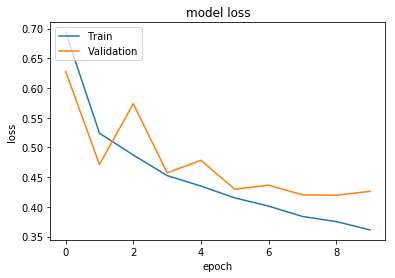

In [73]:
# plot summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot  -2 Accuracy Vs Epochs

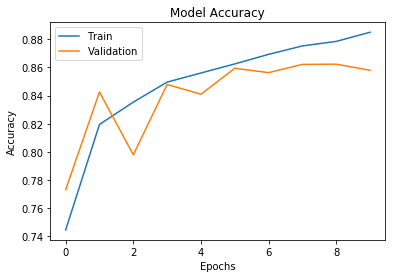

In [74]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'])
plt.show()

Here we have trained our model on 10 epochs, and validtion loss reduced from 42 % to 41%. Therefore we can get better validation loss by increasing the number of epochs. the computation time is low for resent model nearly 9 minutes for 10 epochs. it gives 85 % accuracy on the data. 

# Prediction on Test Data


In [75]:
resnet_pred_mnist = model.predict(test_data)
for i in range(5):
    print(np.argmax(np.round(resnet_pred_mnist[i])))


3
4
1
1
0


# Confusion Matrix

Now we will se our model's performace on confusion matrix :

-----------------Convolutional Neural Network Report---------------
F1 score: 0.8578390855375605
Accuracy score: 0.8579166666666667
Confusion matrix: 
 [[2179  139   56    2    3]
 [ 157 1878  323   57    9]
 [  16   96 1963  243   46]
 [   0   22  170 1977  198]
 [   4    7   36  121 2298]]
Plotting confusion matrix


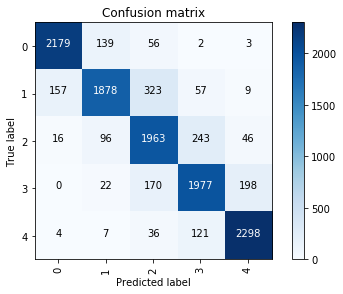

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2379
           1       0.88      0.77      0.82      2424
           2       0.77      0.83      0.80      2364
           3       0.82      0.84      0.83      2367
           4       0.90      0.93      0.92      2466

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



In [78]:
resnet_pred_mnist = model.predict(X_val)
resnet_pred_mnist = np.argmax(resnet_pred_mnist,axis=1)
y_true = np.argmax(y_val,axis=1)

resnet_f1_mnist = metrics.f1_score(y_true, resnet_pred_mnist, average= "weighted")
resnet_accuracy_mnist = metrics.accuracy_score(y_true, resnet_pred_mnist)
resnet_cm_mnist = metrics.confusion_matrix(y_true, resnet_pred_mnist)
print("-----------------Convolutional Neural Network Report---------------")
print("F1 score: {}".format(resnet_f1_mnist))
print("Accuracy score: {}".format(resnet_accuracy_mnist))
print("Confusion matrix: \n", resnet_cm_mnist)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(resnet_cm_mnist, classes = [0,1,2,3,4])
plt.show()

print(metrics.classification_report(y_true, resnet_pred_mnist))

Look at the precision of the class 2, we can see that our model predicted 77 % correctly out of the total labels it has predicted. We did conclude the same from the confusion matrix, where we saw that label 2 and label 3 are misclassified. Label 0 and 4 has the highest precision, recall and othe classification report performance. 

In [79]:
for i in range(len(confusion_matrix)):
    print("Class:",str(i))
    print("Number of Wrong Prediction:", str(sum(confusion_matrix[i])-confusion_matrix[i][i]), "out of 12000")
    print("Percentage of True Prediction: {:.2f}%".format(confusion_matrix[i][i] / 5))
    print("***********************************************************")

Class: 0
Number of Wrong Prediction: 90 out of 12000
Percentage of True Prediction: 457.80%
***********************************************************
Class: 1
Number of Wrong Prediction: 276 out of 12000
Percentage of True Prediction: 429.60%
***********************************************************
Class: 2
Number of Wrong Prediction: 465 out of 12000
Percentage of True Prediction: 379.80%
***********************************************************
Class: 3
Number of Wrong Prediction: 369 out of 12000
Percentage of True Prediction: 399.60%
***********************************************************
Class: 4
Number of Wrong Prediction: 185 out of 12000
Percentage of True Prediction: 456.20%
***********************************************************


from the confusion marix and classification report we can say that our model has predicted class 0 and class 4 with highest accuracy. 

# 2.4: Kaggle Competition Score

We have scored the highest test data prediction score on kaggle using CNN model is approax 89.08 %.

# Comparison of the different algorithms and parameters you tried

We have applied the methods which are stated below as well as the parameters on data 

In this we have used different algorithms to find out the best method which can be used to predict the test data:

1. CNN (Convolution Neural Network)
2. Autoencoder
3. ResNet (Residual Network)

Parameters which we have used to find the best method are:

1. Computation Time
2. Accuracy 
3. F1 Score 
4. Precision
5. Recall
6. Confusion Matrix

# 2.5: Runtime performance for training and testing - 

We have trained our model with different number of epochs and batchsize. the run time performance for these models are
* 1. The run time performance of CNN model_1 - 4 minute
* 2. The run time performance of CNN Model_2 - 13 minutes
* 3. The run time performance of Autoencoder - 109 minutes
* 4. The run time performance of Resnet - 9 minutes

There is significant decrease of the time in CNN and ResNet when we have not applied the image data generator(Data Augmentation).

# 2.6: Evaluate your code with other metrics on the training data (by using some of it as test data) and argue for the benefit of your approach.

By considering the above metrics for all the classifier we can depict that CNN built model has the best accuracy and metrics values when compared with all the classifiers. The risk of over-fitting and under-fititngis less in this model and it has the property of scaling relatively well to high dimensional data.

# Explanation of your model (algorithms, design choices, numbers of parameters)

All the methods as well as the design chose and number parameters are explained above in the question.

# References- 

1. https://www.kaggle.com/fuzzywizard/fashion-mnist-cnn-keras-accuracy-93/
2. https://www.kaggle.com/zalando-research/fashionmnist
3. “A Gentle Introduction to LSTM Autoencoders” , https://machinelearningmastery.com 
4. https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders
5. https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33
6. https://keras.io/examples/cifar10_resnet/
7. https://keras.io/layers/convolutional/